In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:/Users/chant/Downloads/M890081new.csv')

In [3]:
df.head()

,Date,T_Means_Daily_MaximuM,T_Means_Daily_Minimum,T_Absolute_Maximum,T_Absolute_Minimum,Total_Rainfall,Highest_Daily_Rainfall_Total,Number_Of_Rainy_Days,Bright_Sunshine_Daily_Mean,Minimum Relative Humidity,24_Hours_Mean_Relative_Humidity
0,2023 Jul,31.7,26.5,33.6,22.8,158.0,51.4,14,5.8,42,75.1
1,2023 Jun,32.1,26.1,33.5,23.5,228.4,51.6,15,6.3,41,75.1
2,2023 May,32.9,26.7,35.0,23.4,112.8,34.6,11,6.6,43,73.7
3,2023 Apr,32.6,25.8,34.3,23.0,222.8,85.8,19,5.8,45,77.4
4,2023 Mar,30.9,24.6,33.6,21.8,243.4,90.2,12,6.0,52,79.2


In [4]:
df.columns = [x.lower() for x in df.columns]

In [5]:
df.isnull().sum()

date                               0
t_means_daily_maximum              0
t_means_daily_minimum              0
t_absolute_maximum                 0
t_absolute_minimum                 0
total_rainfall                     0
highest_daily_rainfall_total       0
number_of_rainy_days               0
bright_sunshine_daily_mean         0
minimum relative humidity          0
24_hours_mean_relative_humidity    0
dtype: int64

In [6]:
df.dtypes

date                                object
t_means_daily_maximum              float64
t_means_daily_minimum              float64
t_absolute_maximum                 float64
t_absolute_minimum                 float64
total_rainfall                     float64
highest_daily_rainfall_total       float64
number_of_rainy_days                 int64
bright_sunshine_daily_mean         float64
minimum relative humidity           object
24_hours_mean_relative_humidity    float64
dtype: object

In [7]:
# since minimum relative humidity dtypes is object, change it to numeric.zdxs
df['minimum relative humidity'] = pd.to_numeric(df['minimum relative humidity'], errors='coerce')

In [8]:
#fill missing columns with average values
# Fill null values in 'minimum relative humidity' column with the rounded mean value (to two decimal places)
df['minimum relative humidity'] = df['minimum relative humidity'].fillna(round(df['minimum relative humidity'].mean(), 2))

In [9]:
df['minimum relative humidity']

0      42.00
1      41.00
2      43.00
3      45.00
4      52.00
       ...  
578    50.48
579    50.48
580    50.48
581    50.48
582    50.48
Name: minimum relative humidity, Length: 583, dtype: float64

C:\Users\chant\AppData\Local\Temp\ipykernel_13992\1520196048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

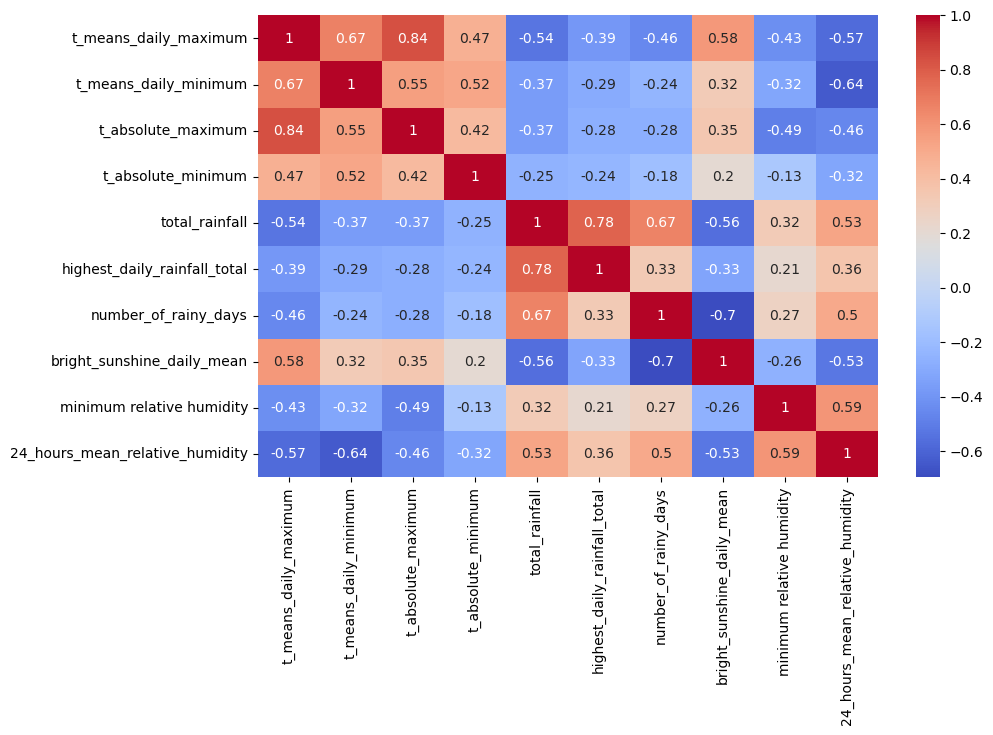

In [10]:
plt.figure(figsize=(10, 6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

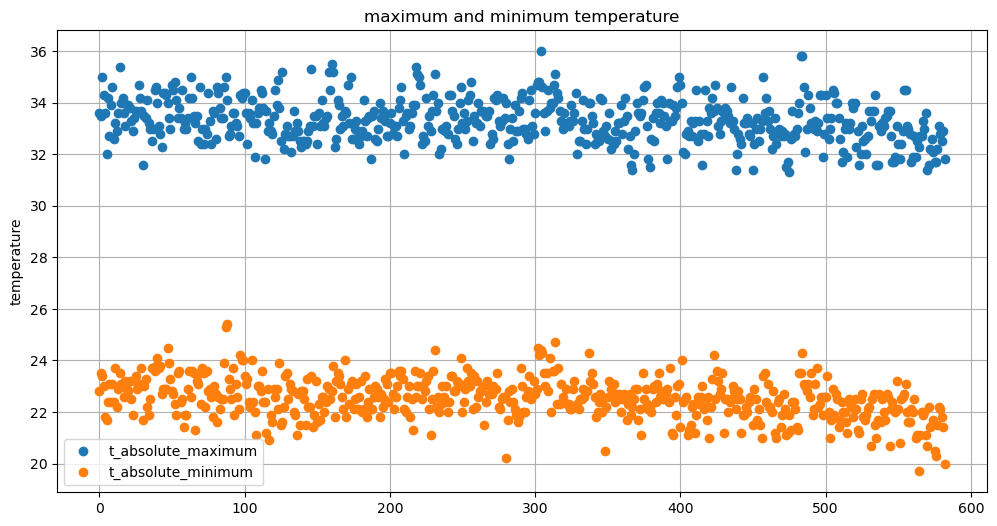

In [11]:
plt.figure(figsize=(12, 6))
df['t_absolute_maximum'].plot(marker='o',linestyle='',label="t_absolute_maximum")
df['t_absolute_minimum'].plot(marker='o',linestyle='',label="t_absolute_minimum")
plt.grid(True)
plt.ylabel('temperature')
plt.title('maximum and minimum temperature')
plt.legend()
plt.show()

<Axes: title={'center': 'Relationship betweenrainy_days and average sunshine'}, xlabel='bright_sunshine_daily_mean', ylabel='number_of_rainy_days'>

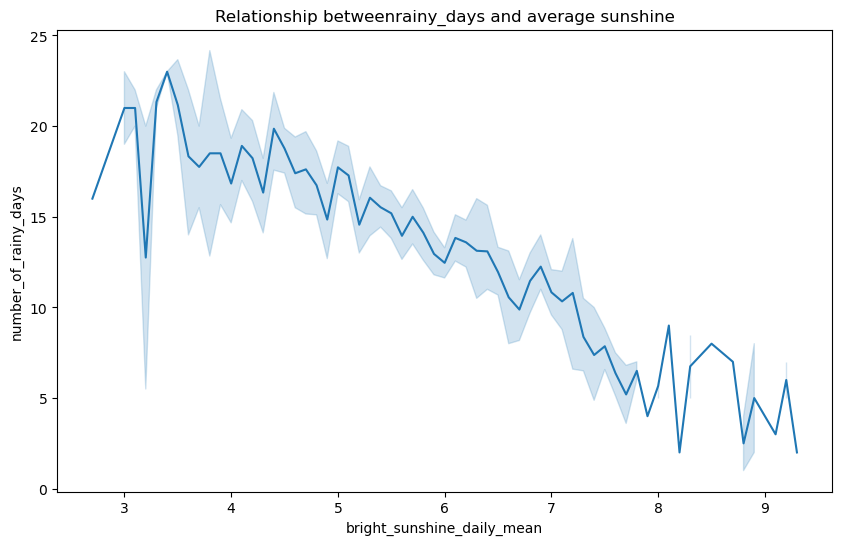

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Relationship betweenrainy_days and average sunshine')
sns.lineplot(df,y='number_of_rainy_days',x='bright_sunshine_daily_mean')

In [13]:
# our target column
df['t_mean']=(df['t_absolute_maximum']+df['t_absolute_minimum'])/2

In [14]:
def features_engineer(df):
    df["date"] = pd.to_datetime(df["date"])
    df["month"] = df["date"].dt.month
    df['year'] = df['date'].dt.year
    
    return df

In [15]:
df = features_engineer(df)
df = df.drop('date',axis=1)
df.head()

,t_means_daily_maximum,t_means_daily_minimum,t_absolute_maximum,t_absolute_minimum,total_rainfall,highest_daily_rainfall_total,number_of_rainy_days,bright_sunshine_daily_mean,minimum relative humidity,24_hours_mean_relative_humidity,t_mean,month,year
0,31.7,26.5,33.6,22.8,158.0,51.4,14,5.8,42.0,75.1,28.20,7,2023
1,32.1,26.1,33.5,23.5,228.4,51.6,15,6.3,41.0,75.1,28.50,6,2023
2,32.9,26.7,35.0,23.4,112.8,34.6,11,6.6,43.0,73.7,29.20,5,2023
3,32.6,25.8,34.3,23.0,222.8,85.8,19,5.8,45.0,77.4,28.65,4,2023
4,30.9,24.6,33.6,21.8,243.4,90.2,12,6.0,52.0,79.2,27.70,3,2023


In [16]:
int_cols = ["number_of_rainy_days","year","month"]
numeric_cols = [x for x in df.columns if x not in int_cols +["t_mean"]]
target = "t_mean"

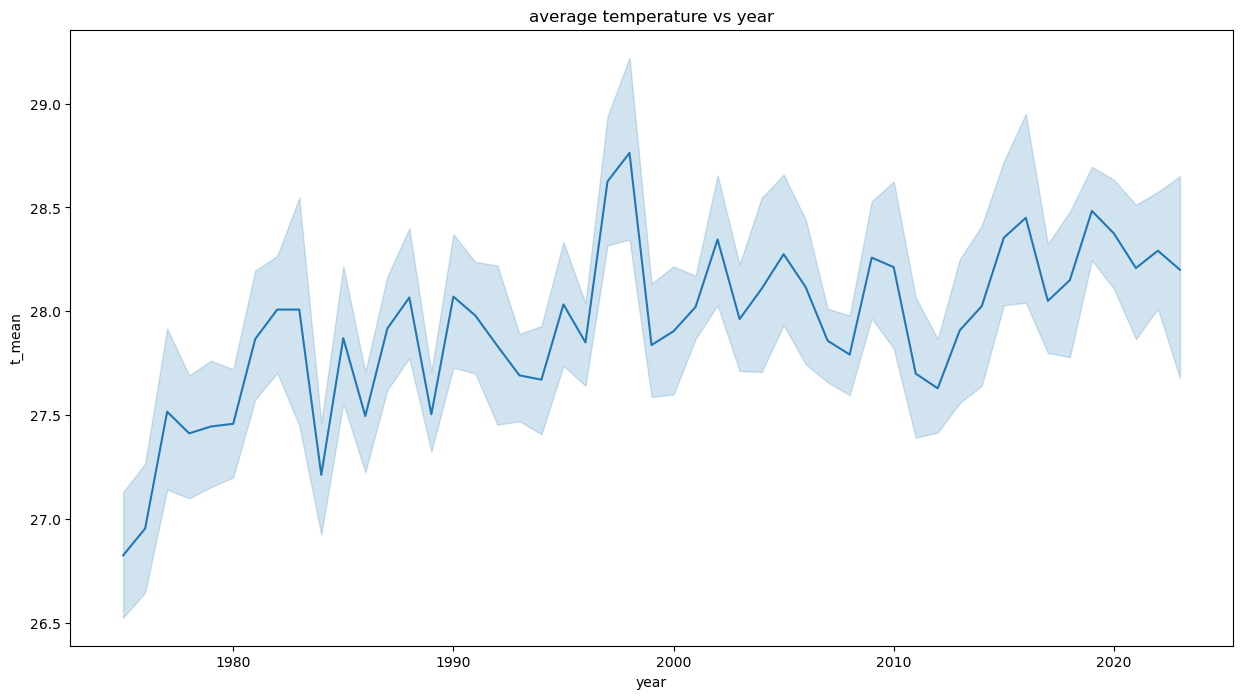

In [17]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='year',y='t_mean',data=df)
plt.title("average temperature vs year")
plt.show()

In [18]:
#scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numeric_cols])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [20]:
df[numeric_cols].head()

,t_means_daily_maximum,t_means_daily_minimum,t_absolute_maximum,t_absolute_minimum,total_rainfall,highest_daily_rainfall_total,bright_sunshine_daily_mean,minimum relative humidity,24_hours_mean_relative_humidity
0,0.517857,0.758621,0.489362,0.543860,0.206086,0.099961,0.469697,0.321429,0.162304
1,0.589286,0.689655,0.468085,0.666667,0.298028,0.100351,0.545455,0.285714,0.162304
2,0.732143,0.793103,0.787234,0.649123,0.147055,0.067161,0.590909,0.357143,0.089005
3,0.678571,0.637931,0.638298,0.578947,0.290714,0.167122,0.469697,0.428571,0.282723
4,0.375000,0.431034,0.489362,0.368421,0.317618,0.175713,0.500000,0.678571,0.376963


In [21]:
X = df[numeric_cols + int_cols]
y = df[target]

In [23]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model=XGBRegressor(n_estimators=200,early_stopping_rounds=50,eval_metric='mae')
model.fit(X_train, y_train, 
          eval_set=[(X_test, y_test)],  # Validation data
          verbose=True)

[0]	validation_0-mae:19.19996
[1]	validation_0-mae:13.44651
[2]	validation_0-mae:9.41487
[3]	validation_0-mae:6.59252
[4]	validation_0-mae:4.62115
[5]	validation_0-mae:3.23854
[6]	validation_0-mae:2.26463
[7]	validation_0-mae:1.59406
[8]	validation_0-mae:1.11339
[9]	validation_0-mae:0.78559
[10]	validation_0-mae:0.55448
[11]	validation_0-mae:0.39209
[12]	validation_0-mae:0.27778
[13]	validation_0-mae:0.19801
[14]	validation_0-mae:0.14443
[15]	validation_0-mae:0.10785
[16]	validation_0-mae:0.08469
[17]	validation_0-mae:0.06972
[18]	validation_0-mae:0.06199
[19]	validation_0-mae:0.05653
[20]	validation_0-mae:0.05356
[21]	validation_0-mae:0.05065
[22]	validation_0-mae:0.04912
[23]	validation_0-mae:0.04747
[24]	validation_0-mae:0.04735
[25]	validation_0-mae:0.04599
[26]	validation_0-mae:0.04622
[27]	validation_0-mae:0.04502
[28]	validation_0-mae:0.04457
[29]	validation_0-mae:0.04448
[30]	validation_0-mae:0.04385
[31]	validation_0-mae:0.04356
[32]	validation_0-mae:0.04364
[33]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
features_data=pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importances'])

<Axes: title={'center': 'feature importance'}>

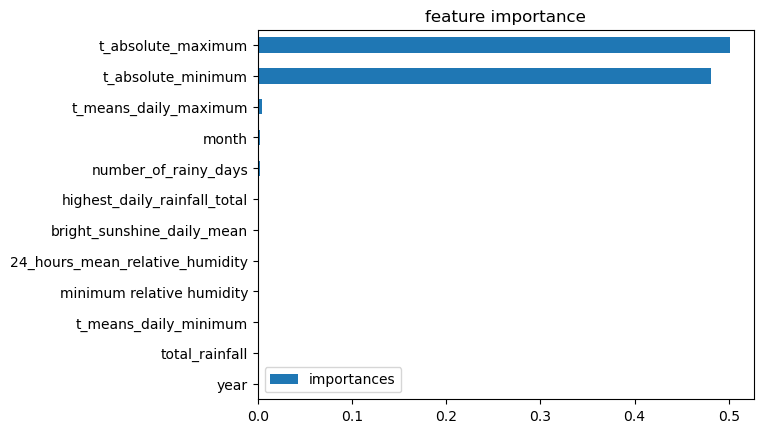

In [27]:
features_data.sort_values('importances').plot(kind='barh',title='feature importance')


In [28]:
predictions=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mean_absolute_error(y_test,predictions)

0.04148599897112155

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)

In [33]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [34]:
new_predictions=rf_model.predict(X_test)

In [35]:
mean_absolute_error(y_test,new_predictions)

0.05476857142857136

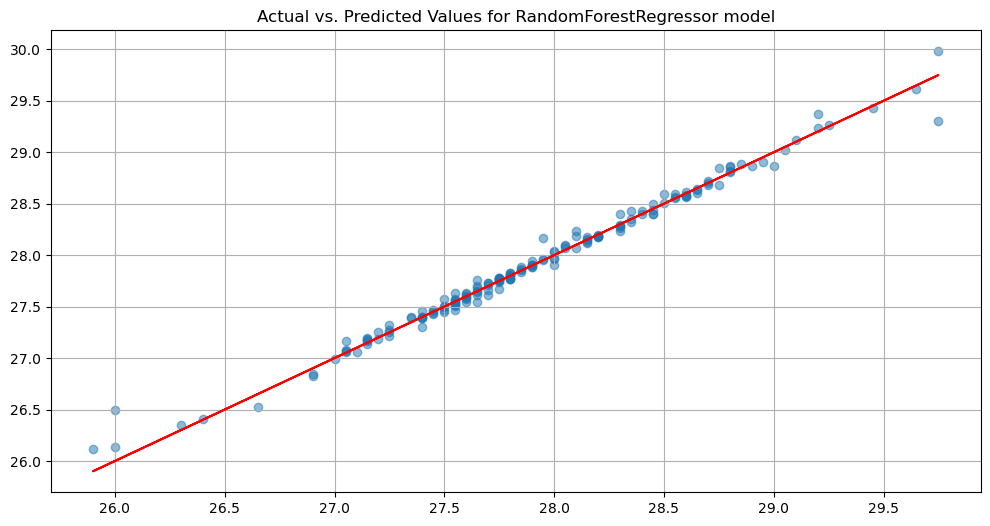

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs. Predicted Values for RandomForestRegressor model')
plt.grid(True)

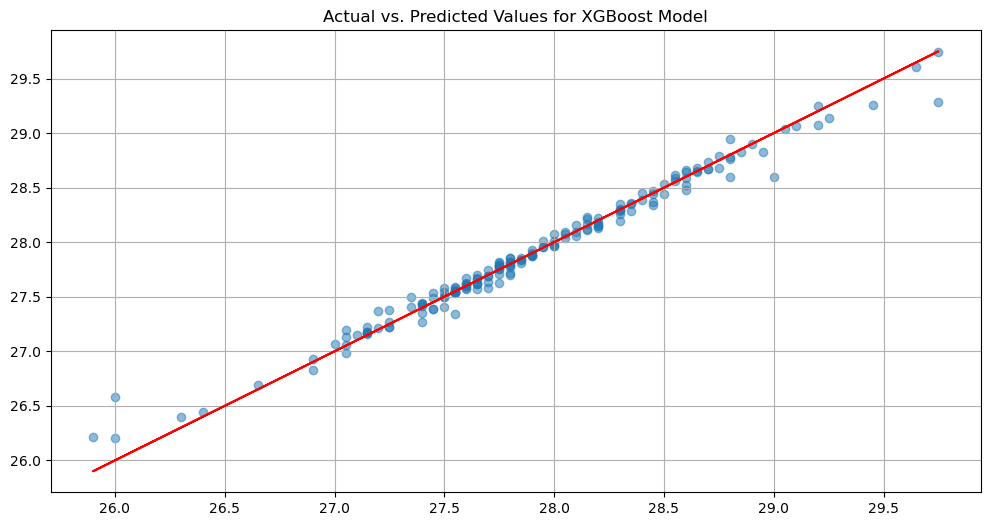

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,new_predictions,alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs. Predicted Values for XGBoost Model')
plt.grid(True)